# Plotting data

The graphical representation of data plotting is one of the most important tools for evaluating and understanding scientific data and theoretical predictions. However, plotting is not a part of core Python but is provided through one of several possible library modules. The most highly developed and widely used plotting package for Python is MatPlotLib (http://MatPlotLib.sourceforge.net/). It is a powerful and flexible program that has become the de facto standard for 2-d plotting with Python.

Because MatPlotLib is an external library (in fact it’s a collection of libraries) it must be imported into any routine that uses it. MatPlotLib makes extensive use of NumPy so the two should be imported together. Therefore, for any program for which you would like to produce 2-d plots, you should include the lines

~~~
import numpy as np
import matplotlib.pyplot as plt
~~~

At the beginning of this lecture we used the *pylab* magic for plotting.

## Simple Plotting

Let us for the moment import the required libraries for plotting and numpy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

We can set some of the parameters for the appearance of graphs globally. In case you still want to modify a part of it, you can set individual parameters later during plotting. The command used here is the 

~~~
plt.rcParams.updat()
~~~

function, which takes a dictionary with the specific parameters as key.

In [3]:
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 20,
                     'axes.labelsize': 18,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

### Line Plot

A line plot ist created with the

~~~
plt.plot(x,y)
~~~

command. You may, however, modify in the parameters the appearance of the plot to a scatter plot. But by default, it creates a line plot.

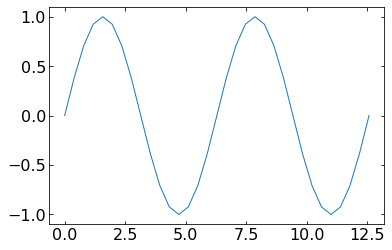

In [4]:
x = np.linspace(0, 4.*np.pi, 33)
y = np.sin(x)

plt.plot(x, y)
plt.show()

We should be always keen to make the diagrams as readable as possible. So we will add some axis labels.

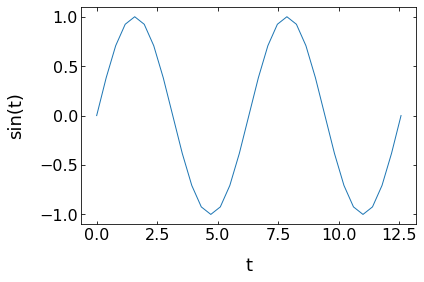

In [7]:
plt.plot(x,np.sin(x)) # using x-axis
plt.xlabel('t') # set the x-axis label
plt.ylabel('sin(t)') # set the y-axis label
plt.show()

### Scatter plot

If you prefer to use symbols for plotting just use the 

~~~
scatter(x,y)
~~~

command of pylab. Note that the scatter command requires a *x* and *y* values and you can set the marker symbol (see an overview of the [marker symbols](https://matplotlib.org/api/markers_api.html)). 

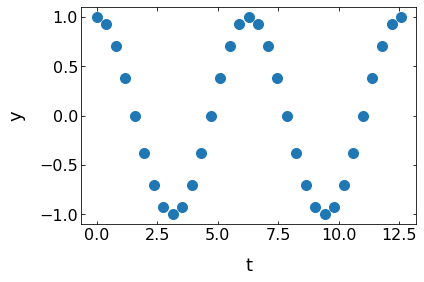

In [8]:
plt.scatter(x,np.cos(x),marker='o')
plt.xlabel('t') # set the x-axis label
plt.ylabel('y') # set the y-axis label
plt.show()

### Histograms

A very useful plotting command is also the *hist* command. It generates a histogram of the data provided. If only the data is given, bins are calculated automatically. If you supply an array of intervalls with *hist(data,bins=b)*, where *b* is and array, the hist command calculates the histogram for the supplied bins. *density=1* normalizes the area below the histogram to 1. The hist command not only returns the graph, but also the occurrences and bins.

<div class="alert alert-info">

**Note:** Physics Interlude
   
Probability density for finding an oscillating particle


</div>

We want to use this occasion to have at least some physics related plotting.

Imagine you have a mass on a spring which is at rest at a position $x_{0}$ and at $t=0$ elongated by a distance $\Delta x$. The spring will then start to oscillate according to

\begin{equation}
x(t)=\Delta x \cos(\omega t)
\end{equation}

If you now need to calculate the probability to find the spring at a certain elongation you need to realize that the oscillator spends a different amount of time at different positions.
The time $dt$ spend in the interval [$x(t)$,$x(t)+dx$] depends on the speed, i.e.

\begin{equation}
v(t)=\frac{dx}{dt}=-\omega \Delta x  \sin(\omega t)
\end{equation}


The probability to find the oscillator at a certain intervall then is the fraction of time residing in this intervall normalized by the half the oscillation period $T/2$.

\begin{equation}
\frac{dt}{T/2}=\frac{1}{T/2}\frac{dx}{v(t)}=\frac{1}{T/2}\frac{-dx}{\omega \Delta x  \sin(\omega t)}
\end{equation}

As the frequency of the oscillator is $\omega=2\pi/T$ we can replace $T$ by $T=2\pi/\omega$ which yields

\begin{equation}
p(x)dx=\frac{1}{\pi \Delta x}\frac{dx}{\sqrt{1-\left (\frac{x(t)}{\Delta x}\right )^2}}
\end{equation}


This is the probability density of finding an oscillating spring at a certain elongation $x(t)$. If you look at the example more closely, it tells you, that you find and elongation more likely when the speed of the mass is slow. This is even a more general issue in non-equilibrium physics. If cells or cars are moving with variable speed, they are more likely to be found at places where they are slow. 

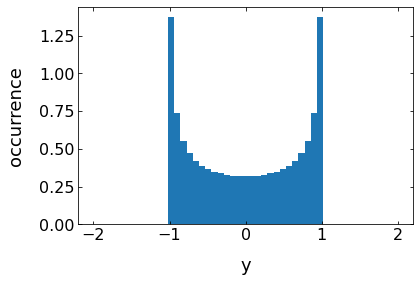

In [41]:
t=np.linspace(0,np.pi,10000)
b=np.linspace(-2,2,50)
n, bins, patches=plt.hist(np.cos(t),bins=b,density=1)
plt.xlabel('y') # set the x-axis label
plt.ylabel('occurrence') # set the y-axis label
plt.show()

***

### Combined plots

You can combine multiple data with the same axes by stacking multiple plots.


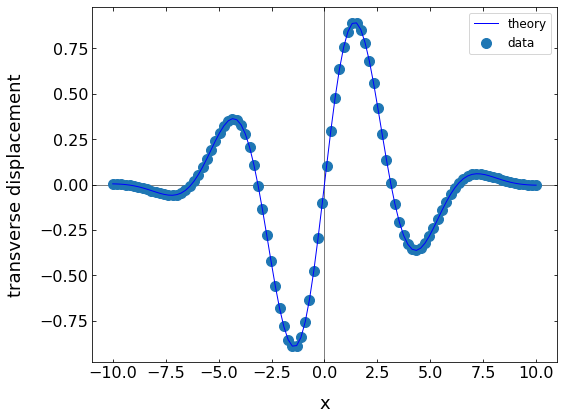

In [40]:
# create x and y arrays for theory
x = np.linspace(-10., 10., 100)
y = np.sin(x) * np.exp(-(x/4.47)**2)

# create plot
plt.figure(1, figsize = (8,6) )
plt.plot(x, y, 'b-', label='theory')
plt.scatter(x, y,  label="data")
plt.xlabel('x')
plt.ylabel('transverse displacement')
plt.legend(loc='upper right')
plt.axhline(color = 'gray', zorder=-1)
plt.axvline(color = 'gray', zorder=-1)
# save plot to file
plt.tight_layout()
plt.savefig('WavyPulse.pdf') # display plot on screen

The functions that do the plotting begin on line 12. Let’s go through them one by one and see what they do. You will notice in several cases that keyword arguments (kwargs) are used in several cases. Keyword arguments are optional arguments that have the form kwarg= data, where data might be a number, a string, a tuple, or some other form of data.

- **figure()** creates a blank figure window. If it has no arguments, it creates a window that is 8 inches wide and 6 inches high by default, although the size that appears on your computer depends on your screen’s resolution. For most computers, it will be much smaller. You can create a window whose size differs from the default using the optional keyword argument figsize, as we have done here. If you use figsize, set it equal to a 2-element tuple where the elements are the width and height, respectively, of the plot. Multiple calls to figure() opens multiple windows: figure(1) opens up one window for plotting, figure(2) another, and figure(3) yet another.

- **plot(x, y, optional arguments )** graphs the x-y data in the arrays x and y. The third argument is a format string that specifies the color and the type of line or symbol that is used to plot the data. The string ’ro’ specifies a red (r) circle (o). The string ’b-’ specifies a blue (b) solid line (-). The keyword argument label is set equal to a string that labels the data if the legend function is called subsequently.

- **xlabel( string )** takes a string argument that specifies the label for the graph’s x-axis.

- **ylabel( string )** takes a string argument that specifies the label for the graph’s y-axis.

- **legend()** makes a legend for the data plotted. Each x-y data set is labeled using the string that was supplied by the label keyword in the plot function that graphed the data set. The loc keyword argument specifies the location of the legend.

- **axhline()** draws a horizontal line across the width of the plot at y=0. The optional keyword argument color is a string that specifies the color of the line. The default color is black. The optional keyword argument zorder is an integer that specifies which plotting elements are in front of or behind others. By default, new plotting elements appear on top of previously plotted elements and have a value of zorder=0. By specifying zorder=-1, the horizontal line is plotted behind all ex- isting plot elements that have not be assigned an explicit zorder less than -1.

- **axvline()** draws a vertical line from the top to the bottom of the plot at x=0. See axhline() for explanation of the arguments.

- **savefig( string )** saves the figure to data data file with a name specified by the string argument. The string argument can also contain path information if you want to save the file so some place other than the default directory.

- **show()** displays the plot on the computer screen. No screen output is produced before this function is called.

## Plots with error bars

When plotting experimental data it is customary to include error bars that indicate graphically the degree of uncertainty that exists in the measurement of each data point. The MatPlotLib function errorbar plots data with error bars attached. It can be used in a way that either replaces or augments the plot function. Both vertical and horizontal error bars can be displayed. The figure below illustrates the use of error bars.

The code and plot below illustrates how to make error bars and was used to make the above plot. Lines 14 and 15 contain the call to the errorbar function. The x error bars are all set to a constant value of 0.75, meaning that the error bars extend 0.75 to the left and 0.75 to the right of each data point. The y error bars are set equal to an array, which was read in from the data file containing the data to be plotted, so each data point has a different y error bar. By the way, leaving out the xerr keyword argument in the errorbar function call below would mean that only the y error bars would be plotted.

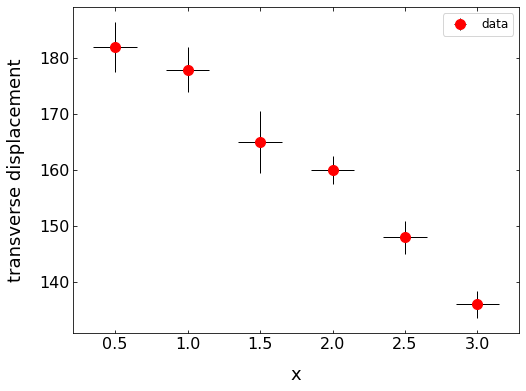

In [36]:
import numpy as np
import matplotlib.pyplot as plt
# read data from file
dataPt, xdata, ydata, yerror = np.loadtxt("MyData.txt", skiprows=5 , unpack=True)
# create plot
plt.figure(1, figsize = (8,6) )
plt.errorbar(xdata, ydata, fmt="ro", label="data",
             xerr=0.15, yerr=yerror, ecolor="black")
plt.xlabel("x")
plt.ylabel("transverse displacement")
plt.legend(loc="upper right")
# save plot to file
plt.savefig("ExpDecay.pdf")
# display plot on screen
plt.show()

### Setting plotting limits and excluding data

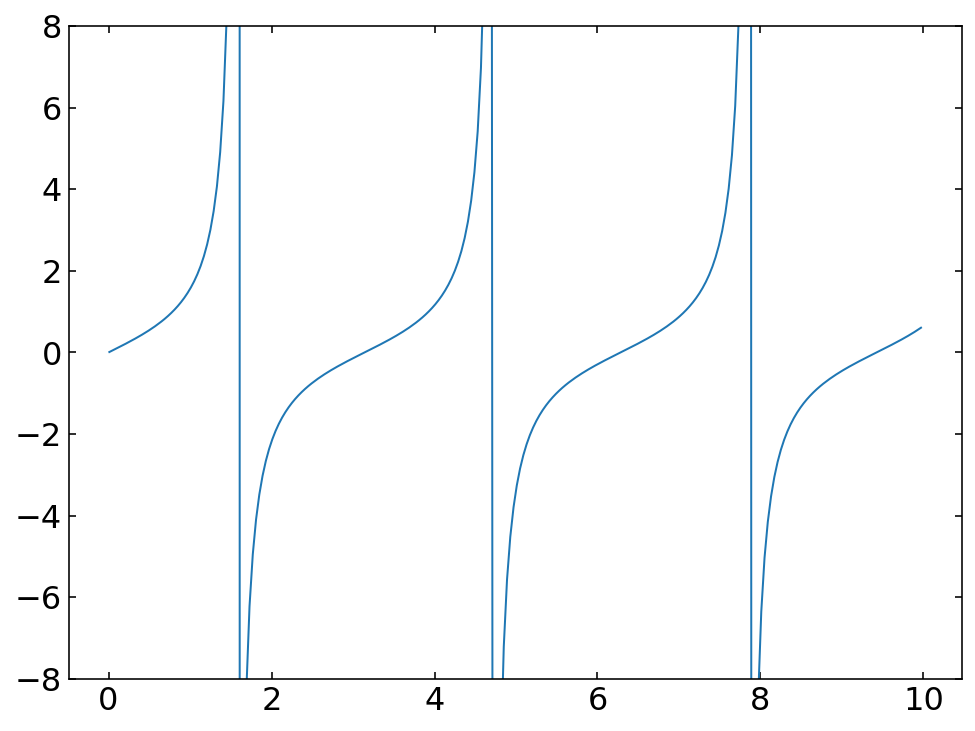

In [46]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.arange(0.01, 10., 0.04)
ytan = np.tan(theta)
plt.figure(figsize=(8,6))
plt.plot(theta, ytan)
plt.ylim(-8, 8) # restricts range of y axis from -8 to +8 plt.axhline(color="gray", zorder=-1)
plt.show()

** Masked arrays**

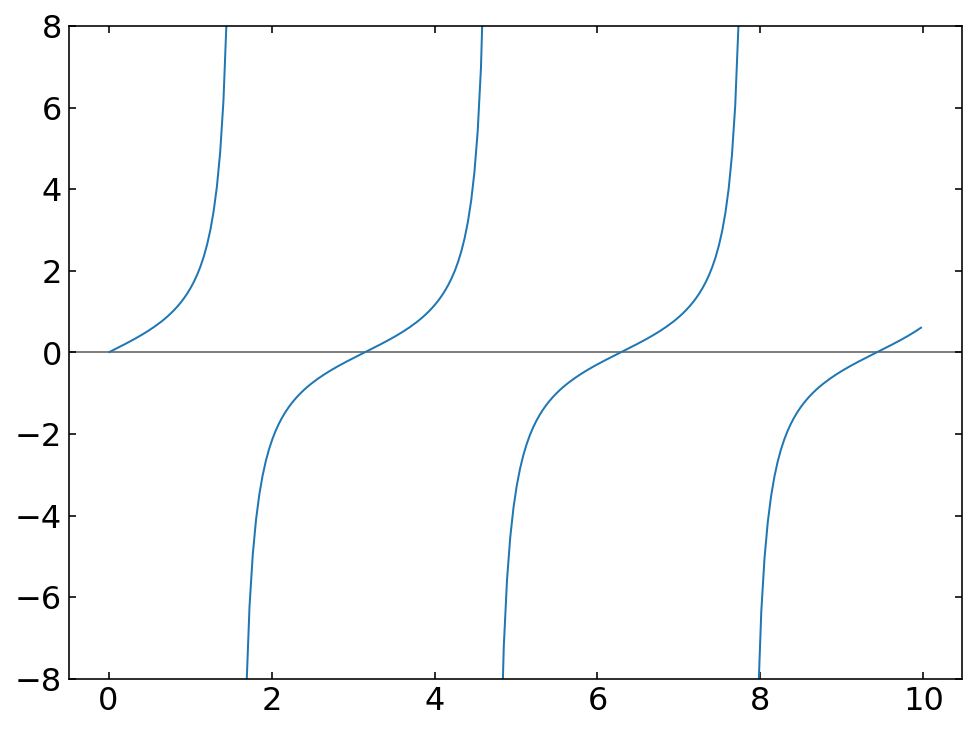

In [451]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.arange(0.01, 10., 0.04)
ytan = np.tan(theta)
ytanM = np.ma.masked_where(np.abs(ytan)>20., ytan)
plt.figure(figsize=(8,6))
plt.plot(theta, ytanM)
plt.ylim(-8, 8)
plt.axhline(color="gray", zorder=-1)
plt.show()

## Subplots


Often you want to create two or more graphs and place them next to one another, generally because they are related to each other in some way.

The function subplot, called on lines 13 and 24, creates the two subplots in the above figure. subplot has three arguments. The first specifies the number of rows that the figure space is to be divided into; on line 13, it’s two. The second specifies the number of columns that the figure space is to be divided into; on line 13, it’s one. The third argument specifies which rectangle the will contain the plot specified by the following function calls. Line 13 specifies that the plotting commands that follow will be act on the first box. Line 24 specifies that the plotting commands that follow will be act on the second box.

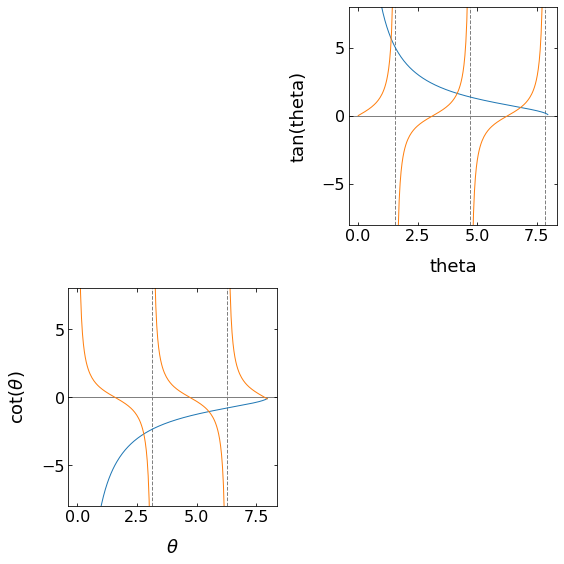

In [16]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.arange(0.01, 8., 0.04)
y = np.sqrt((8./theta)**2-1.)
ytan = np.tan(theta)
ytan = np.ma.masked_where(np.abs(ytan)>20., ytan)
ycot = 1./np.tan(theta)

ycot = np.ma.masked_where(np.abs(ycot)>20., ycot)
plt.figure(1,figsize=(8,8))
plt.subplot(2, 2, 2)
plt.plot(theta, y)
plt.plot(theta, ytan)
plt.ylim(-8, 8)
plt.axhline(color="gray", zorder=-1)
plt.axvline(x=np.pi/2., color="gray", linestyle="--", zorder=-1)
plt.axvline(x=3.*np.pi/2., color="gray", linestyle="--", zorder=-1)
plt.axvline(x=5.*np.pi/2., color="gray", linestyle="--", zorder=-1)
plt.xlabel("theta")
plt.ylabel("tan(theta)")

plt.subplot(2, 2, 3)
plt.plot(theta, -y)
plt.plot(theta, ycot)
plt.ylim(-8, 8)
plt.axhline(color="gray", zorder=-1)
plt.axvline(x=np.pi, color="gray", linestyle="--", zorder=-1)
plt.axvline(x=2.*np.pi, color="gray", linestyle="--", zorder=-1)
plt.xlabel(r'$\theta$')
plt.ylabel(r'cot($\theta$)')

plt.tight_layout()
plt.show()

##  Logarithmic plots
 
 Data sets can span many orders of magnitude from fractional quantities much smaller than unity to values much larger than unity. In such cases it is often useful to plot the data on logarithmic axes.

### Semi-log plots


For data sets that vary exponentially in the independent variable, it is often useful to use one or more logarithmic axes. Radioactive decay of unstable nuclei, for example, exhibits an exponential decrease in the number of particles emitted from the nuclei as a function of time.

MatPlotLib provides two functions for making semi-logarithmic plots, semilogx and semilogy, for creating plots with logarithmic x and y axes, with linear y and x axes, respectively. We illustrate their use in the program below, which made the above plots.

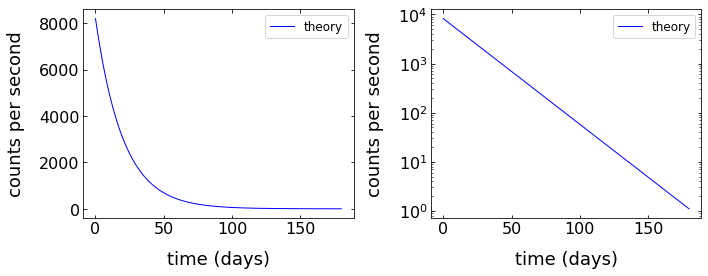

In [34]:

# create theoretical fitting curve
tau = 20.2 # Phosphorus-32 half life = 14 days; tau = t_half/ln(2)
N0 = 8200. # Initial count rate (per second)
t = np.linspace(0, 180, 128)
N = N0 * np.exp(-t/tau)

# create plot
plt.figure(1, figsize = (10,4) )

plt.subplot(1, 2, 1)
plt.plot(t, N, 'b-', label="theory")
#plt.plot(time, counts, 'ro', label="data")
plt.xlabel('time (days)')
plt.ylabel('counts per second')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.semilogy(t, N, 'b-', label="theory")
#plt.semilogy(time, counts, 'ro', label="data")
plt.xlabel('time (days)')
plt.ylabel('counts per second')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Log-log plots

MatPlotLib can also make log-log or double-logarithmic plots using the function loglog. It is useful when both the $x$ and $y$ data span many orders of magnitude. Data that are described by a power law $y=Ax^b$, where $A$ and $b$ are constants, appear as straight lines when plotted on a log-log plot. Again, the loglog function works just like the plot function but with logarithmic axes.

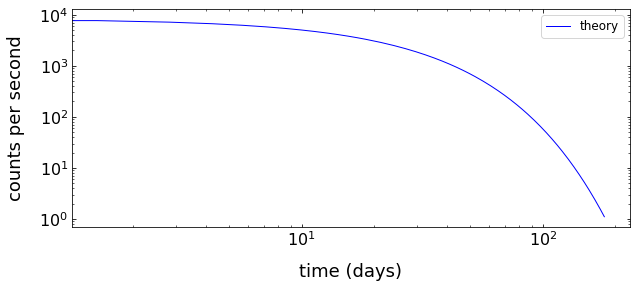

In [15]:

# create theoretical fitting curve
tau = 20.2 # Phosphorus-32 half life = 14 days; tau = t_half/ln(2)
N0 = 8200. # Initial count rate (per second)
t = np.linspace(0, 180, 128)
N = N0 * np.exp(-t/tau)

# create plot
plt.figure(1, figsize = (10,4) )
plt.loglog(t, N, 'b-', label="theory")
#plt.plot(time, counts, 'ro', label="data")
plt.xlabel('time (days)')
plt.ylabel('counts per second')
plt.legend(loc='upper right')
plt.show()


## Contour and Density Plots

A contour plots are useful tools to study two dimensional data, meaning $Z(X,Y)$. A contour plots isolines of the function $Z$.

### Simple contour plot

<div class="alert alert-info">

**Note:**
   
**Physics Interlude** - Interference of spherical waves


</div>


We use a simple example of a wave interference for two dimensional plotting in contour and density plots. 

Our wave shall be represented by a snapshot of a spherical wave at a certain time.

\begin{equation}
Z(X,Y)=\frac{1}{r}\sin\left( \frac{2\pi}{\lambda} r \right)
\end{equation}

Here $r$ is the distance from the source $r=\sqrt{X^2+Y^2}$. To show interference, we just use two of those waves as a superposition. To keep it simple we will skip the $1/r$ amplitude decay and just use the $\sin$ part. We don't care about the details of the physics here. The code might be useful for later studies.

In [46]:
lmda = 2 # defines the wavelength 
x01=1.5*np.pi # location of the first source, y01=0
x02=2.5*np.pi # location of the second source, y02=0
x = np.linspace(0, 4*np.pi, 100)
y = np.linspace(0, 4*np.pi, 100)


X, Y = np.meshgrid(x, y)
Z =  (np.sin(np.sqrt((X-x01)**2+Y**2)*2*np.pi/lmda)+np.sin(np.sqrt((X-x02)**2+Y**2)*2*np.pi/lmda))**2

In [47]:
np.shape(Z)

(100, 100)

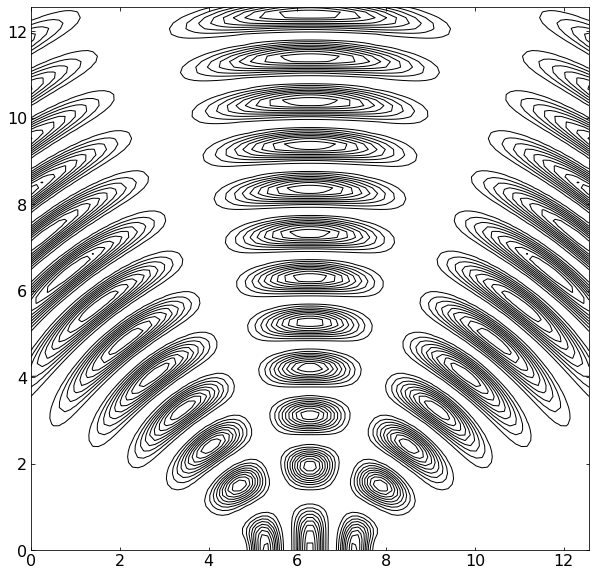

In [48]:
plt.figure(1,figsize=(10,10))
plt.contour(X, Y, Z, 10, colors='black')
plt.show()

### Color contour plot

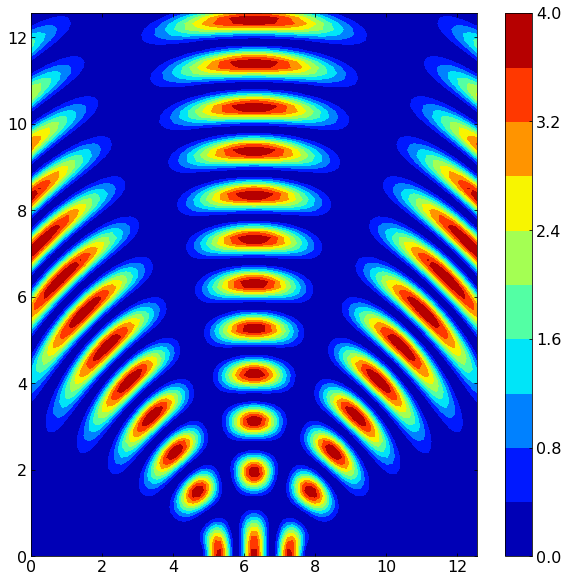

In [49]:
plt.figure(1,figsize=(10,10))
plt.contourf(X, Y, Z, 10, cmap='jet')
plt.colorbar()
plt.show()

### Image plot

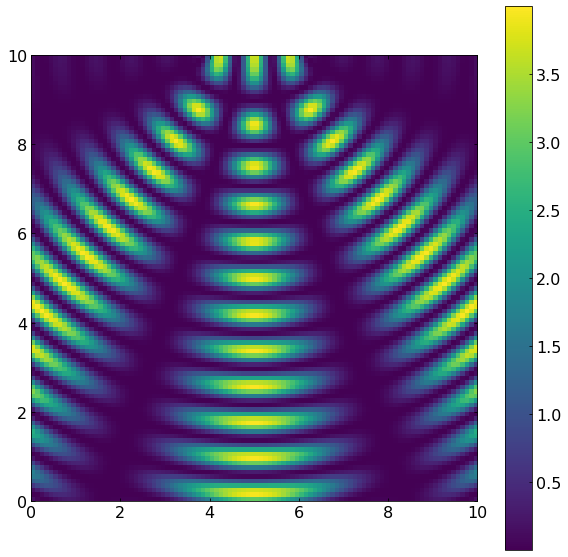

In [50]:
plt.figure(1,figsize=(10,10))
plt.imshow(Z,extent=[0,10,0,10]);
plt.colorbar()
plt.show()

## 3D Plotting

Matplotlib was initially designed with only two-dimensional plotting in mind. Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization. Three-dimensional plots are enabled by importing the mplot3d toolkit, included with the main Matplotlib installation:

In [16]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword projection='3d' to any of the normal axes creation routines:

### Projection Scence

Text(0.5, 0, 'z')

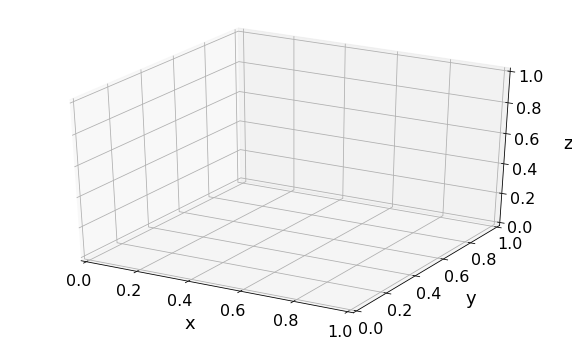

In [18]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use %matplotlib notebook rather than %matplotlib inline when running this code.

### Line Plotting in 3D

from sets of (x, y, z) triples. In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ax.plot3D and ax.scatter3D functions. The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to Simple Line Plots and Simple Scatter Plots for more information on controlling the output. Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

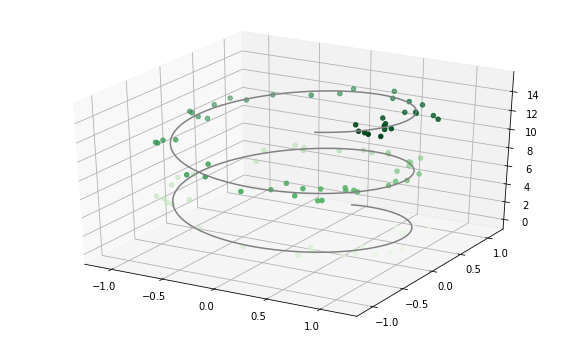

In [4]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page. While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points. Use the *scatter3D* or the *plot3D* method to plot a random walk in 3-dimensions in your exercise.

### Surface Plotting 

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

In [19]:
x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 60)

X, Y = np.meshgrid(x, y)
Z=np.sin(X)*np.sin(Y)

In [20]:
np.shape(Z)

(60, 50)

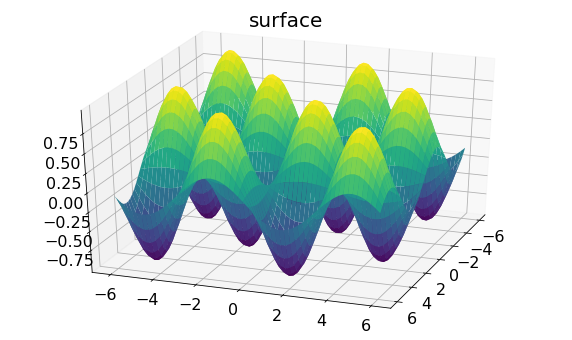

In [26]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.view_init(30, 20)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');